# Lab: Regression Analysis

### Before you start:

* Read the README.md file
* Comment as much as you can and use the resources (README.md file) 

Happy learning!

## Challenge 1
I work at a coding bootcamp, and I have developed a theory that the younger my students are, the more often they are late to class. In order to test my hypothesis, I have collected some data in the following table:

| StudentID | Age | Tardies |
|--------|-----|------------|
| 1      | 17  | 10         |
| 2      | 51  | 1          |
| 3      | 27  | 5          |
| 4      | 21  | 9         |
| 5      | 36  |  4         |
| 6      | 48  |  2         |
| 7      | 19  |  9         |
| 8      | 26  | 6          |
| 9      | 54  |  0         |
| 10     | 30  |  3         |

Use this command to create a dataframe with the data provided in the table. 
~~~~
student_data = pd.DataFrame({'X': [x_values], 'Y': [y_values]})
~~~~

In [1]:
import seaborn as sns
from matplotlib import pyplot as plt
from matplotlib import cm
%matplotlib inline
%config Inlinebackend.figure_format = 'retina'
sns.set_context("poster")
sns.set(rc={"figure.figsize": (15.,8.)})
sns.set_style("whitegrid")

# Librerías de modelado
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression

import pandas as pd
import numpy as np

In [2]:
# Your code here. 
student_data = pd.DataFrame({'X': [17, 51, 27, 21, 36, 48, 19, 26, 54, 30], 'Y': [10, 1, 5, 9, 4, 2, 9, 6, 0, 3]})

Draw a dispersion diagram (scatter plot) for the data.

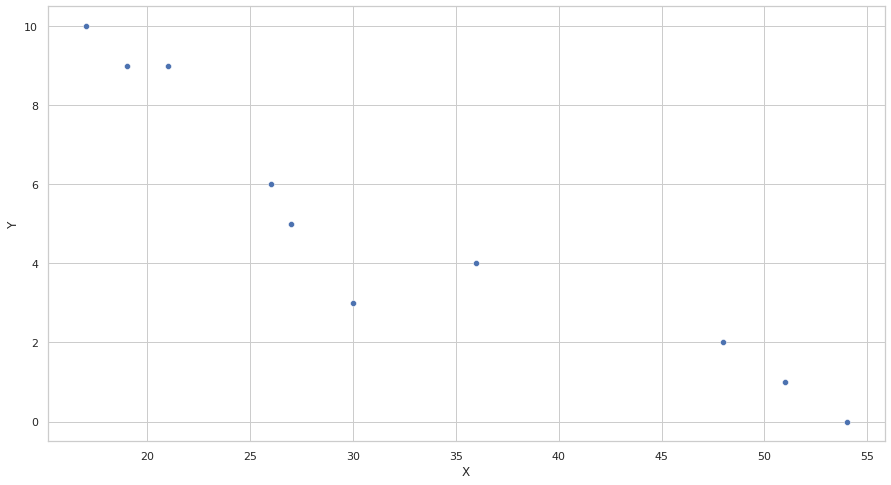

In [3]:
# Your code here.
sns.scatterplot(x=student_data["X"], y=student_data["Y"]);

Do you see a trend? Can you make any hypotheses about the relationship between age and number of tardies?

In [4]:
# Your response here. 
# Parece que hay una realción inversamente proporcional entre edad y tardies
student_data["predicción"] = -0.33 * student_data.X + 16
student_data

,X,Y,predicción
0,17,10,10.39
1,51,1,-0.83
2,27,5,7.09
3,21,9,9.07
4,36,4,4.12
5,48,2,0.16
6,19,9,9.73
7,26,6,7.42
8,54,0,-1.82
9,30,3,6.10


Calculate the covariance and correlation of the variables in your plot. What is the difference between these two measures? Compare their values. What do they tell you in this case? Add your responses as comments after your code.

In [5]:
# Your response here.
cov =pd.DataFrame(np.cov(student_data.X, student_data.Y))
cov
# se ve que la relación  es inversamente proporcional.


,0,1
0,187.655556,-45.566667
1,-45.566667,12.544444


In [6]:
student_data.corr()
# En la correlación se obserca la mis relacionpro en valores normalizados.

,X,Y,predicción
X,1.000000,-0.939163,-1.000000
Y,-0.939163,1.000000,0.939163
predicción,-1.000000,0.939163,1.000000


In [7]:
student_data["error"] = (student_data.Y - student_data["predicción"]).abs()
student_data.error.mean()

1.3410000000000002

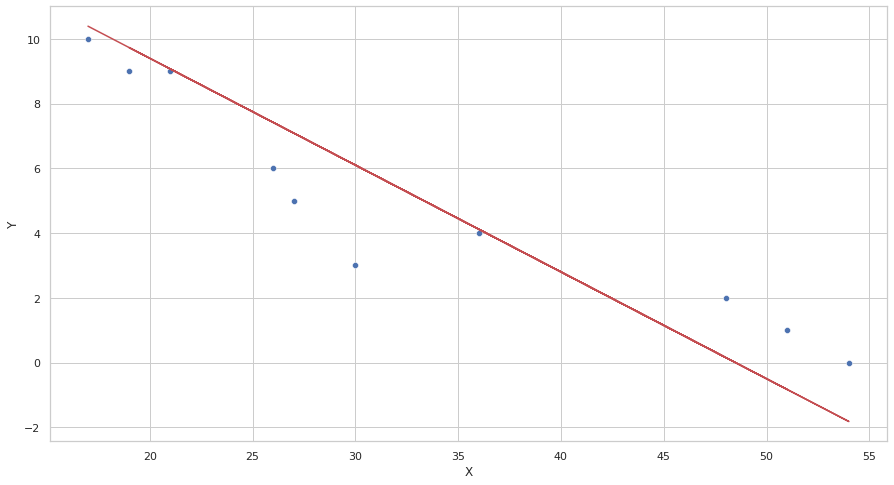

In [8]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"])
plt.plot(student_data.X,student_data["predicción"] , color='r')

Build a regression model for this data. What will be your outcome variable? What type of regression are you using? Add your responses as comments after your code.

In [9]:
# la outcome variable seran los retrasos , es lo que queremos precie
# El tipo de regresión sera lineal.
# Your response here.
lr = LinearRegression()
lr.fit(
    X = student_data[["X"]], #siempre es un dataframe por eso pongo doble corchete
    y = student_data.Y #es una serie de pandas
)

LinearRegression()

In [10]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

12.888803363135771 -0.2428207709159809


In [11]:
student_data["predicción_modelo"] = (student_data.X * lr.coef_[0]) + lr.intercept_

Plot your regression model on your scatter plot.

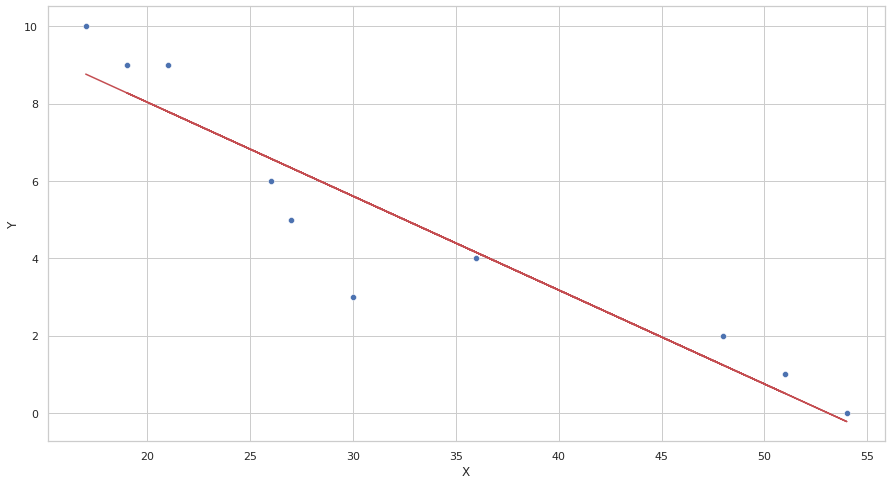

In [12]:
sns.scatterplot(x=student_data["X"], y=student_data["Y"])
plt.plot(student_data.X,student_data["predicción_modelo"] , color='r')

Interpret the results of your model. What can conclusions can you draw from your model and how confident in these conclusions are you? Can we say that age is a good predictor of tardiness? Add your responses as comments after your code.

In [13]:
# Your response here.

# Te nemos un r square de 0.882 que es un valor alto que indica que es bastante confiable


results = smf.ols("Y ~ X", data = student_data).fit()
results.summary()

/home/fer/miniconda3/envs/minimal_ds/lib/python3.9/site-packages/scipy/stats/stats.py:1541: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  warnings.warn("kurtosistest only valid for n>=20 ... continuing "


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      Y   R-squared:                       0.882
Model:                            OLS   Adj. R-squared:                  0.867
Method:                 Least Squares   F-statistic:                     59.81
Date:                Tue, 23 Nov 2021   Prob (F-statistic):           5.57e-05
Time:                        17:48:42   Log-Likelihood:                -15.622
No. Observations:                  10   AIC:                             35.24
Df Residuals:                       8   BIC:                             35.85
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     12.8888      1.111     11.605      0.000      10.328      15.450
X             -0.2428      0.031     -7.734      0.000      -0.315      -0.170
==============================================================================
Omnibus:                        3.949   Durbin-Watson:                   1.754
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                1.714
Skew:                          -1.014   Prob(JB):                        0.424
Kurtosis:                       3.069   Cond. No.                         96.4
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Challenge 2
For the second part of this lab, we will use the vehicles.csv data set. You can find a copy of the dataset in the git hub folder. This dataset includes variables related to vehicle characteristics, including the model, make, and energy efficiency standards, as well as each car's CO2 emissions. As discussed in class the goal of this exercise is to predict vehicles' CO2 emissions based on several independent variables. 

In [14]:
veh = pd.read_csv("vehicles.csv")
veh.head()

,Make,Model,Year,Engine Displacement,Cylinders,Transmission,Drivetrain,Vehicle Class,Fuel Type,Fuel Barrels/Year,City MPG,Highway MPG,Combined MPG,CO2 Emission Grams/Mile,Fuel Cost/Year
0,AM General,DJ Po Vehicle 2WD,1984,2.5,4.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,19.388824,18,17,17,522.764706,1950
1,AM General,FJ8c Post Office,1984,4.2,6.0,Automatic 3-spd,2-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
2,AM General,Post Office DJ5 2WD,1985,2.5,4.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,20.600625,16,17,16,555.437500,2100
3,AM General,Post Office DJ8 2WD,1985,4.2,6.0,Automatic 3-spd,Rear-Wheel Drive,Special Purpose Vehicle 2WD,Regular,25.354615,13,13,13,683.615385,2550
4,ASC Incorporated,GNX,1987,3.8,6.0,Automatic 4-spd,Rear-Wheel Drive,Midsize Cars,Premium,20.600625,14,21,16,555.437500,2550


In [15]:
veh_cor = veh[["Year","Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year","CO2 Emission Grams/Mile"]]
veh_cor.corr()

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile
Year,1.000000,0.082469,-0.221084,0.204751,-0.091913,-0.222300
Cylinders,0.082469,1.000000,0.739517,-0.698648,0.778153,0.752393
Fuel Barrels/Year,-0.221084,0.739517,1.000000,-0.909743,0.916208,0.986189
Combined MPG,0.204751,-0.698648,-0.909743,1.000000,-0.875185,-0.926229
Fuel Cost/Year,-0.091913,0.778153,0.916208,-0.875185,1.000000,0.930865
CO2 Emission Grams/Mile,-0.222300,0.752393,0.986189,-0.926229,0.930865,1.000000


In [16]:
X = veh_cor[["Year","Cylinders", "Fuel Barrels/Year", "Combined MPG","Fuel Cost/Year"]]
y = veh_cor["CO2 Emission Grams/Mile"]

In [17]:
lr.fit(X,y)
veh_cor["prediccion"] = lr.predict(X)

/tmp/ipykernel_529/4229292246.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  veh_cor["prediccion"] = lr.predict(X)


In [18]:
veh_cor.head(3)

,Year,Cylinders,Fuel Barrels/Year,Combined MPG,Fuel Cost/Year,CO2 Emission Grams/Mile,prediccion
0,1984,4.0,19.388824,17,1950,522.764706,522.030384
1,1984,6.0,25.354615,13,2550,683.615385,671.001053
2,1985,4.0,20.600625,16,2100,555.437500,552.684951


Let's use the following variables for our analysis: Year, Cylinders, Fuel Barrels/Year, Combined MPG, and Fuel Cost/Year. We will use 'CO2 Emission Grams/Mile' as our outcome variable. 

Calculate the correlations between each of these variables and the outcome. Which variable do you think will be the most important in determining CO2 emissions? Which provides the least amount of helpful information for determining CO2 emissions? Add your responses as comments after your code.

Build a regression model for this data. What type of regression are you using? Add your responses as comments after your code.

Print your regression summary, and interpret the results. What are the most important varibles in your model and why? What can conclusions can you draw from your model and how confident in these conclusions are you? Add your responses as comments after your code.

In [19]:
# Your response here. 
veh.rename({"Fuel Barrels/Year":"Fuel_Barrels_Year","CO2 Emission Grams/Mile":"CO2_Emission_Grams_Mile","Fuel Cost_Year":"Fuel_Cost_Year","Combined MPG":"Combined_MPG"}, axis = 1, inplace = True)
results = smf.ols("CO2_Emission_Grams_Mile ~ Year + Cylinders + Fuel_Barrels_Year + Combined_MPG + Fuel_Barrels_Year" , data = veh).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     CO2_Emission_Grams_Mile   R-squared:                       0.978
Model:                                 OLS   Adj. R-squared:                  0.978
Method:                      Least Squares   F-statistic:                 4.087e+05
Date:                     Tue, 23 Nov 2021   Prob (F-statistic):               0.00
Time:                             17:48:42   Log-Likelihood:            -1.5384e+05
No. Observations:                    35952   AIC:                         3.077e+05
Df Residuals:                        35947   BIC:                         3.077e+05
Df Model:                                4                                         
Covariance Type:                 nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept           558.5101     20.294     27.521      0.000     518.734     598.287
Year                 -0.2017      0.010    -19.942      0.000      -0.221      -0.182
Cylinders             3.4635      0.085     40.969      0.000       3.298       3.629
Fuel_Barrels_Year    21.2847      0.054    391.306      0.000      21.178      21.391
Combined_MPG         -3.7382      0.044    -85.671      0.000      -3.824      -3.653
==============================================================================
Omnibus:                    77183.457   Durbin-Watson:                   0.810
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        403938615.437
Skew:                          19.194   Prob(JB):                         0.00
Kurtosis:                     520.859   Cond. No.                     4.41e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.41e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

## Bonus Challenge: Error Analysis

I am suspicious about the last few parties I have thrown: it seems that the more people I invite the more people are unable to attend. To know if my hunch is supported by data, I have decided to do an analysis. I have collected my data in the table below, where X is the number of people I invited, and Y is the number of people who attended. 

|  X |  Y |
|----|----|
| 1  |  1 |
| 3  |  2 |
| 4  |  4 |
| 6  |  4 |
| 8  |  5 |
| 9  |  7 |
| 11 |  8 |
| 14 |  13 |

We want to know if the relationship modeled by the two random variables is linear or not, and therefore if it is appropriate to model it with a linear regression. 
First, build a dataframe with the data. 

In [37]:
# Your code here. 
data  = pd.DataFrame({'X': [1,3,4,6,8,9,11,14], 'Y':[1,2,4,4,5,7,8,13]})
data

,X,Y
0,1,1
1,3,2
2,4,4
3,6,4
4,8,5
5,9,7
6,11,8
7,14,13


Draw a dispersion diagram (scatter plot) for the data, and fit a regression line.

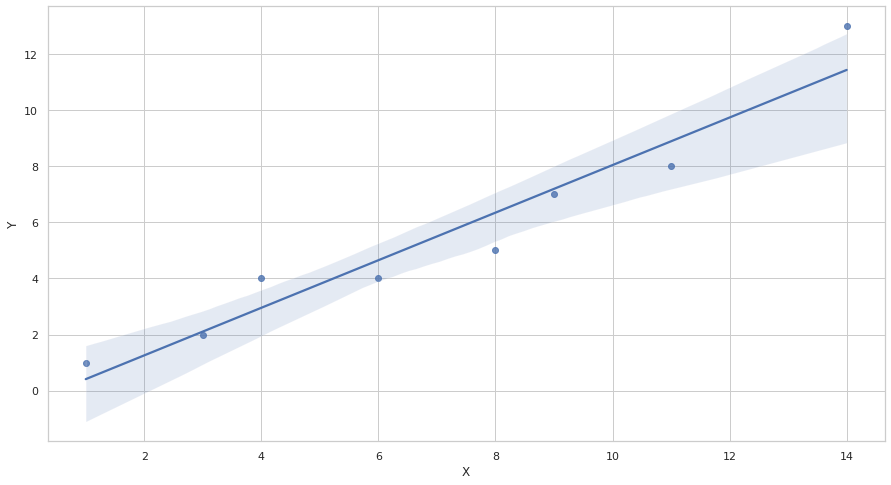

In [38]:
sns.regplot(x="X", y="Y", data=data);

What do you see? What does this plot tell you about the likely relationship between the variables? Print the results from your regression.

In [39]:
# Your response here. 

In [40]:
lr = LinearRegression()

lr.fit(
    X = data[["X"]], 
    y = data.Y
)


LinearRegression()

In [41]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

-0.43939393939393945 0.8484848484848485


In [42]:
data["predicción"] = (data.X * lr.coef_[0]) + lr.intercept_

In [43]:
data

,X,Y,predicción
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939
7,14,13,11.439394


Do you see any problematic points, or outliers, in your data? Remove these points and recalculate your regression. Print the new dispersion diagram with your new model and the results of your model. 

In [44]:
# Your response here. 
data = data.drop([7], axis=0)
data

,X,Y,predicción
0,1,1,0.409091
1,3,2,2.106061
2,4,4,2.954545
3,6,4,4.651515
4,8,5,6.348485
5,9,7,7.196970
6,11,8,8.893939


What changed? Based on the results of the two models and your graphs, what can you say about the form of the data with the problematic point and without it?

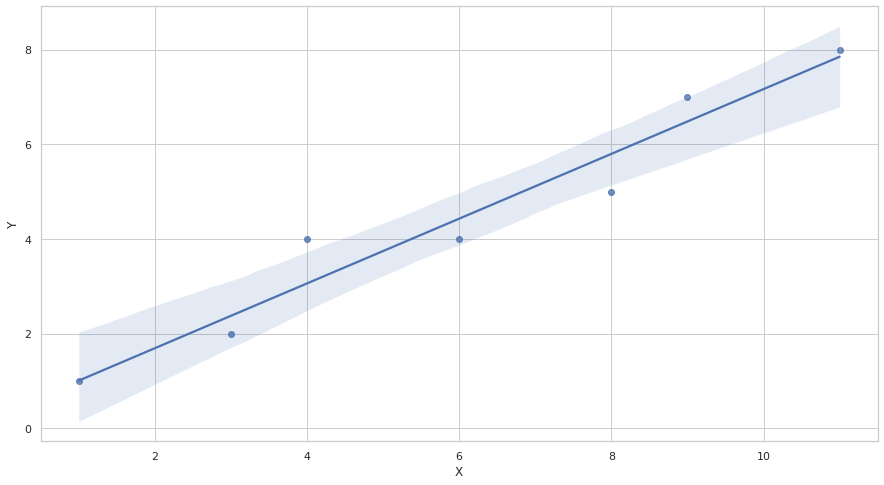

In [45]:
sns.regplot(x="X", y="Y", data=data);

In [46]:
lr = LinearRegression()

lr.fit(
    X = data[["X"]], 
    y = data.Y
)


LinearRegression()

In [47]:
beta_1 = lr.coef_[0]
beta_0 = lr.intercept_
print(beta_0, beta_1)

0.32330827067669254 0.6842105263157894
